# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The objective is to analyze the provided dataset of 426,000 used cars to identify which features most strongly influence the vehicle's price. 
### This involves performing univariate and bivariate analyses by comparing the target variable (price) with individual predictor variables (i.e., mileage, year, brand, fuel type). 
### I will generate graphical summaries (i.e., boxplots, histograms, scatter plots) and numerical summaries (i.e., means, medians, correlations) to understand the distribution and relationships between price and other variables. 
### The goal is to uncover patterns and trends that can inform pricing strategies and highlight what car attributes consumers value most in the used car market.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Cleaning and Exploratory Data Analysis
### After refining the business understanding, we proceed with constructing a clean and reliable dataset suitable for modeling. 
### During the data cleaning phase, we address several integrity issues: we identify and handle missing values through appropriate imputation strategies, remove any duplicate records that may bias our results, and detect and address outliers that could distort model training. We also correct incorrect data types to ensure compatibility with modeling tools and fix or remove invalid entries (i.e., impossible mileage or negative prices).
### Following cleaning, we conduct exploratory data analysis (EDA) to better understand the dataset. 
### We begin with univariate analysis, examining the distribution of price and other individual features such as mileage, year, and brand. This is followed by bivariate analysis, where we explore how price relates to other variables using both graphical summaries (i.e., boxplots, scatter plots, and histograms) and numerical summaries (i.e., means, medians, and correlation coefficients). 
### These steps help us uncover meaningful patterns and relationships in the data, which guide feature engineering and transformation steps—such as scaling, normalization, or applying logarithmic transformations—in preparation for modeling with tools like scikit-learn.
### We will look primarily at the top factors that affect car price: cylinders, age, model, manufacturer, odometer, title_status and condition

In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:,.0f}'.format)

In [62]:
df = pd.read_csv("vehicles.csv")

In [63]:
df.shape

(426880, 18)

In [64]:
df.sample(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
120694,7302567408,albany,17990,"2,020",mitsubishi,outlander sport es,good,NaN,other,"16,631",clean,other,JA4AP3AU6LU017301,NaN,NaN,hatchback,NaN,ga
46032,7316051405,redding,5000,"1,974",mercedes-benz,benz 280c,fair,NaN,gas,"78,278",clean,automatic,1.14073E+13,NaN,NaN,NaN,silver,ca
380277,7316270443,san antonio,0,"2,015",ford,f-250,NaN,NaN,diesel,"140,258",clean,automatic,NaN,4wd,NaN,pickup,blue,tx
323587,7316513389,portland,16995,"2,011",dodge,durango citadel awd v8 hemi heated leather moo...,NaN,8 cylinders,gas,"104,701",clean,automatic,1D4SE5GT0BC594973,4wd,NaN,SUV,silver,or
90209,7314239616,"washington, DC",18989,"2,016",nissan,maxima,NaN,6 cylinders,gas,"43,435",clean,automatic,1N4AA6AP6GC383781,fwd,mid-size,sedan,black,dc
424058,7311073495,milwaukee,12500,"2,011",honda,cr-v,excellent,4 cylinders,gas,"96,000",clean,automatic,NaN,4wd,sub-compact,SUV,grey,wi
272822,7314478233,long island,41200,"1,997",lexus,lx 450,NaN,6 cylinders,gas,"233,000",clean,automatic,NaN,4wd,NaN,SUV,green,ny
144382,7302584147,"quad cities, IA/IL",16896,"2,016",chevrolet,malibu ls,NaN,NaN,gas,"48,559",clean,automatic,NaN,NaN,NaN,NaN,NaN,il
319391,7314795996,medford-ashland,46495,"2,017",ford,f-150,NaN,6 cylinders,gas,"58,297",clean,automatic,1FTEW1EG1HFC64661,4wd,NaN,truck,black,or
74111,7310485308,colorado springs,6999,"2,012",ford,fusion sel,excellent,4 cylinders,gas,"113,167",clean,automatic,3FAHP0JA4CR302682,fwd,full-size,sedan,white,co


In [65]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [66]:
df["cylinders"].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [67]:
df["cylinders"].value_counts(normalize = True)

cylinders
6 cylinders    0
4 cylinders    0
8 cylinders    0
5 cylinders    0
10 cylinders   0
other          0
3 cylinders    0
12 cylinders   0
Name: proportion, dtype: float64

In [68]:
df["title_status"].value_counts()

title_status
clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: count, dtype: int64

In [74]:
df["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [77]:
df["model"].value_counts()

model
f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: count, Length: 29649, dtype: int64

In [80]:
df["manufacturer"].value_counts()

manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin

In [82]:
df["odometer"].value_counts()

odometer
100,000    2263
1          2246
0          1965
200,000    1728
150,000    1603
           ... 
149,468       1
154,259       1
111,887       1
213,826       1
26,892        1
Name: count, Length: 104870, dtype: int64

In [84]:
bins = [0, 10000, 30000, 60000, 100000, 150000, 200000, float('inf')]
labels = [
    "0 - 10,000",
    "10,001 - 30,000",
    "30,001 - 60,000",
    "60,001 - 100,000",
    "100,001 - 150,000",
    "150,001 - 200,000",
    "200,001+"
]

# Bin the odometer values
df["odometer_range"] = pd.cut(df["odometer"], bins=bins, labels=labels, right=True, include_lowest=True)

# Get the counts in each range
odometer_counts = df["odometer_range"].value_counts().sort_index()

print(odometer_counts)


odometer_range
0 - 10,000           29761
10,001 - 30,000      54948
30,001 - 60,000      70295
60,001 - 100,000     92137
100,001 - 150,000    99102
150,001 - 200,000    53067
200,001+             23170
Name: count, dtype: int64


In [86]:
df["condition"].value_counts()

condition
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [88]:
df["year"].value_counts()

year
2,017    36420
2,018    36369
2,015    31538
2,013    30794
2,016    30434
         ...  
1,943        1
1,915        1
1,902        1
1,905        1
1,909        1
Name: count, Length: 114, dtype: int64

In [90]:
# convert year to age with 2025 being the current year and adding the column into df
df["age"] = 2025 - df["year"]
df["age"].value_counts().sort_index()

age
3        133
4       2396
5      19298
6      25375
7      36369
       ...  
120        1
122       12
123        1
124        3
125       12
Name: count, Length: 114, dtype: int64

In [92]:
# Drop cars older than 60 years for the regression to prevent vintage car outliers
df = df[df["age"] <= 60]
df["age"].value_counts().sort_index()

age
3       133
4      2396
5     19298
6     25375
7     36369
8     36420
9     30434
10    31538
11    30283
12    30794
13    23898
14    20341
15    15829
16    12185
17    17150
18    14873
19    12763
20    10622
21     8971
22     7151
23     5587
24     4443
25     3572
26     3094
27     1988
28     1724
29     1302
30     1246
31      968
32      712
33      626
34      608
35      599
36      571
37      528
38      532
39      523
40      469
41      387
42      257
43      217
44      214
45      272
46      387
47      345
48      273
49      242
50      204
51      280
52      334
53      409
54      312
55      345
56      409
57      425
58      357
59      424
60      365
Name: count, dtype: int64

In [94]:
# Drop rows where 'cylinders' is empty or NaN
df = df[df["cylinders"].notna()]                # Remove NaN values
df = df[df["cylinders"].str.strip() != ""]      # Remove empty strings

# Drop rows where 'cylinders' is 'other'
df = df[df["cylinders"] != "other"]

# Convert text like '6 cylinders' to numeric values 
df["cylinders"] = df["cylinders"].str.extract(r"(\d+)").astype(int)


In [95]:
# Determine the percentiles of the price to determine where to cut off the data
df["price"].describe([0.0, 0.05, 0.1, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99]).round(2)

count         244,712
mean           66,950
std        12,510,661
min                 0
0%                  0
5%                  0
10%             1,200
50%            11,998
80%            27,999
85%            31,990
90%            36,590
95%            42,590
97%            48,900
99%            64,895
max     3,736,928,711
Name: price, dtype: float64

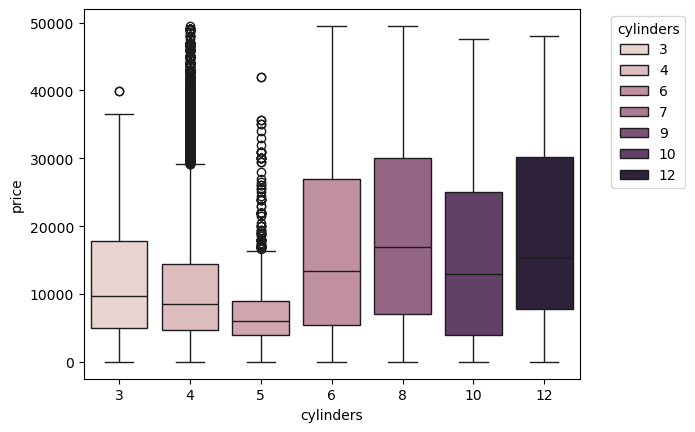

In [96]:
# Creating box and whisker plot for cylinders vs. price at 97% ($49500)
sns.boxplot(data = df.query("price < 49500"), x = "cylinders", y = "price", hue = "cylinders")

# Move the legend outside the plot
plt.legend(title="cylinders", bbox_to_anchor=(1.05, 1), loc='upper left')

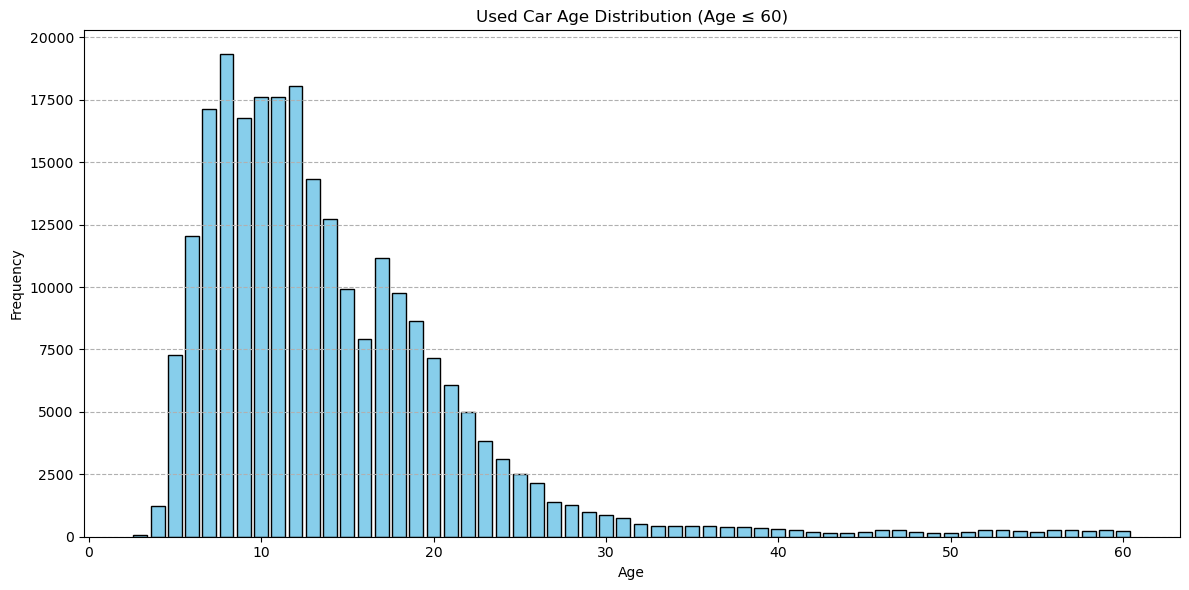

In [113]:
# Plotting histogram of age of vehicles
age_counts = df["age"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
plt.title("Used Car Age Distribution (Age ≤ 60)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

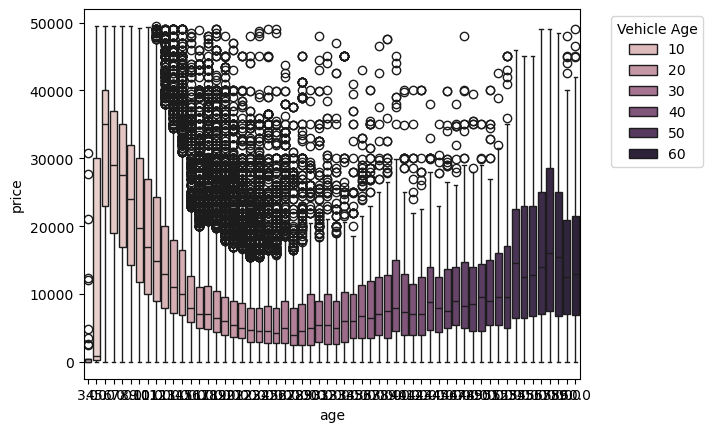

In [129]:
# Plotting age vs. price
sns.boxplot(data = df.query("price < 49500"), x = "age", y = "price", hue = "age")
# Move the legend outside the plot
plt.legend(title="Vehicle Age", bbox_to_anchor=(1.05, 1), loc='upper left')

In [123]:
# Since the above doesn't give too much information, creating Age bins
# Define bin edges and labels
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60"]

# Create a new column for age group
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)



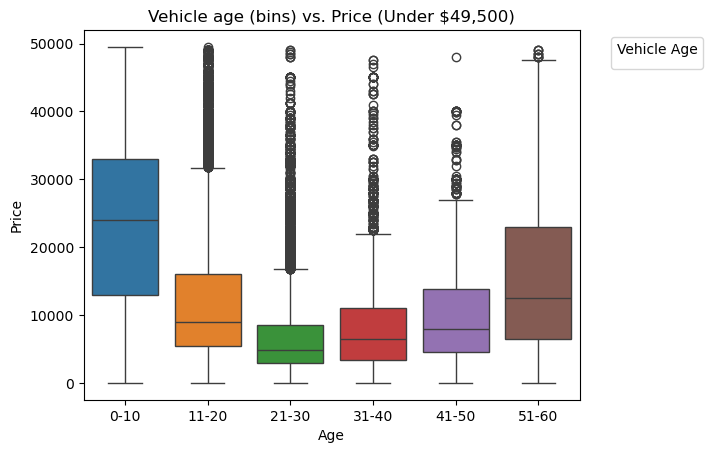

In [143]:
# Plotting age bin vs. price (97%)
sns.boxplot(data = df.query("price < 49500"), x = "age_group", y = "price", hue = "age_group")

# Move the legend outside the plot
plt.legend(title="Vehicle Age", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Vehicle age (bins) vs. Price (Under $49,500)")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

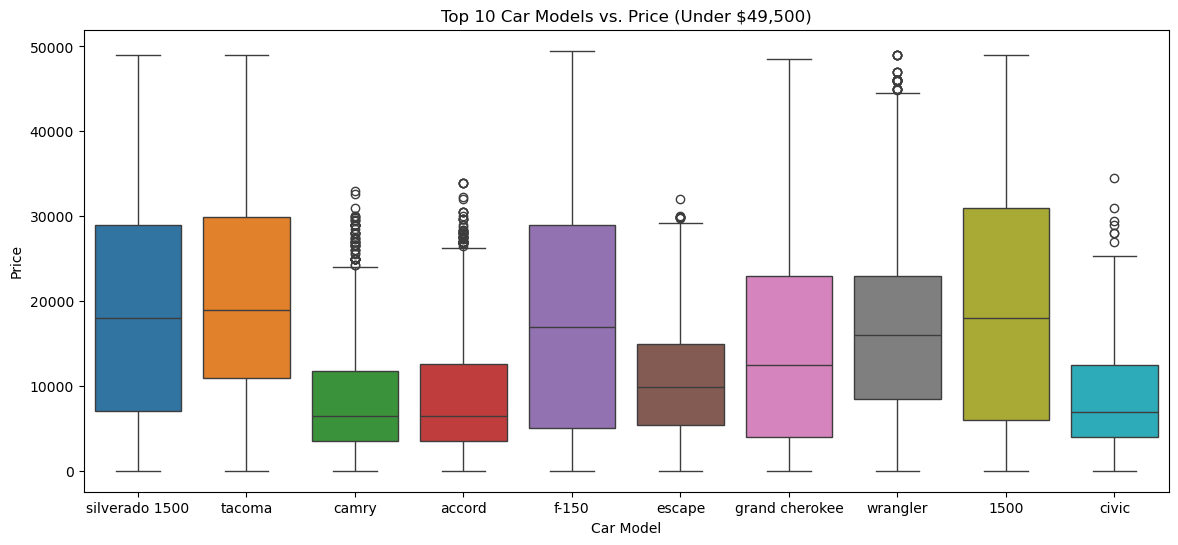

In [141]:
# Plotting box plot for the top 10 models versus price for the 97th percentile
plt.figure(figsize=(14, 6))
top_ten = df["model"].value_counts()[:10].index.tolist()
sns.boxplot(data = df.query("model == @top_ten").query("price < 49500"), x = "model", y = "price", hue = "model")

plt.title("Top 10 Car Models vs. Price (Under $49,500)")
plt.xlabel("Car Model")
plt.ylabel("Price")
plt.show()

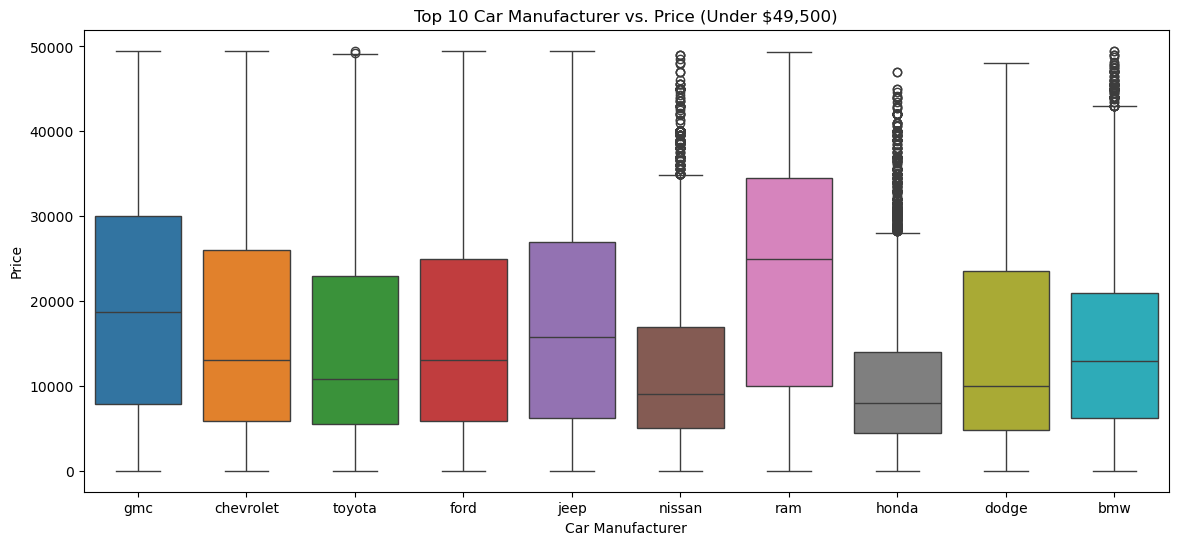

In [145]:
# Plotting box plot for the top 10 manufacturers versus price for the 97th percentile
plt.figure(figsize=(14, 6))
top_ten = df["manufacturer"].value_counts()[:10].index.tolist()
sns.boxplot(data = df.query("manufacturer == @top_ten").query("price < 49500"), x = "manufacturer", y = "price", hue = "manufacturer")

plt.title("Top 10 Car Manufacturer vs. Price (Under $49,500)")
plt.xlabel("Car Manufacturer")
plt.ylabel("Price")
plt.show()

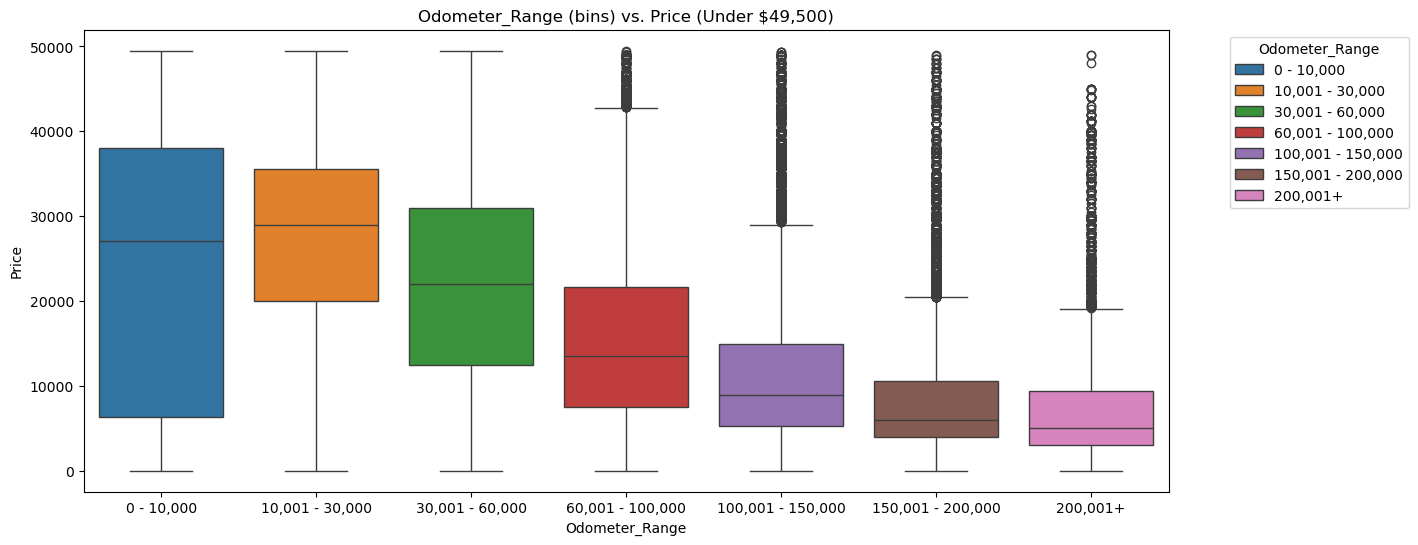

In [153]:
# Plotting odometer range vs. price (97%)
plt.figure(figsize=(14, 6))
sns.boxplot(data = df.query("price < 49500"), x = "odometer_range", y = "price", hue = "odometer_range")

# Move the legend outside the plot

plt.legend(title="Odometer_Range", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Odometer_Range (bins) vs. Price (Under $49,500)")
plt.xlabel("Odometer_Range")
plt.ylabel("Price")
plt.show()

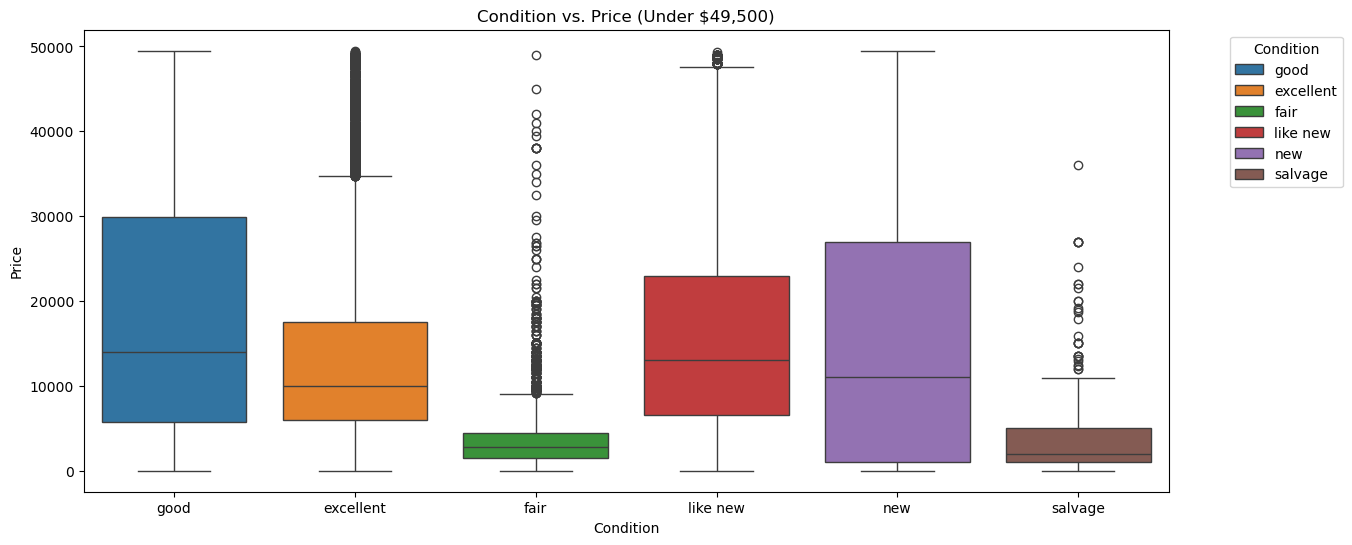

In [155]:
# Plotting odometer range vs. price (97%)
plt.figure(figsize=(14, 6))
sns.boxplot(data = df.query("price < 49500"), x = "condition", y = "price", hue = "condition")

# Move the legend outside the plot
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Condition vs. Price (Under $49,500)")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

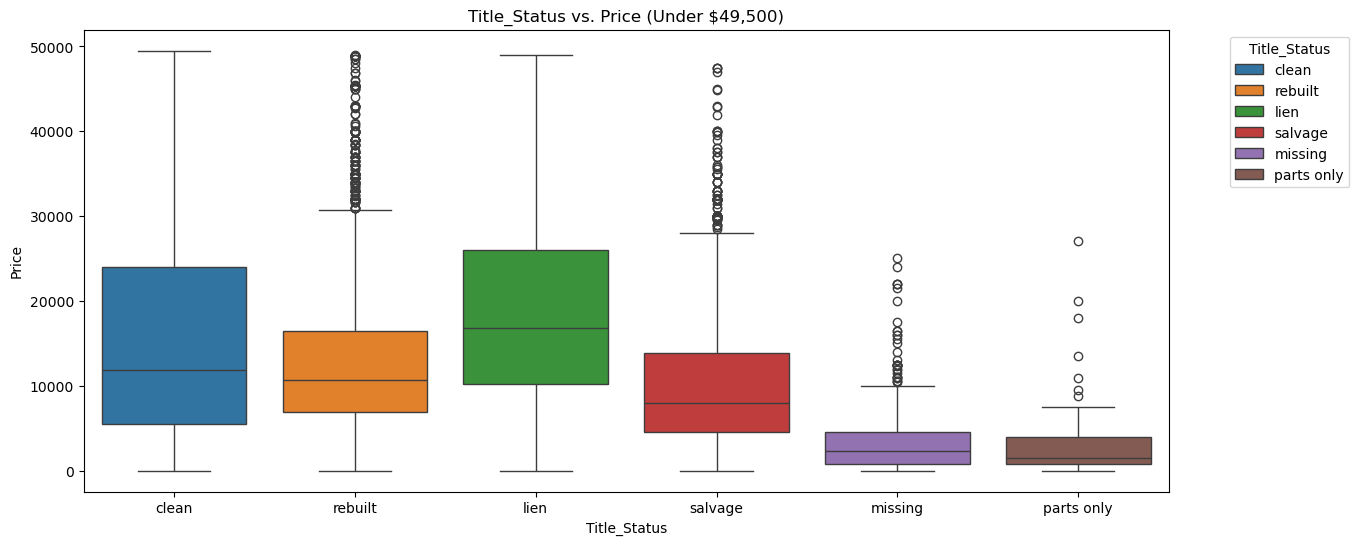

In [157]:
# Plotting odometer range vs. price (97%)
plt.figure(figsize=(14, 6))
sns.boxplot(data = df.query("price < 49500"), x = "title_status", y = "price", hue = "title_status")

# Move the legend outside the plot
plt.legend(title="Title_Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Title_Status vs. Price (Under $49,500)")
plt.xlabel("Title_Status")
plt.ylabel("Price")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [178]:
# Creating the test-train split (20 – 80)
# Filter the original DataFrame for the data containing the 97th percentile for price

filtered_df = df[df["price"] < 49500]

# Create X and binary target y
X = filtered_df.drop("price", axis=1)
y = filtered_df["price"]

# In the feature selection I am just going to select the following features and create 
# a new data frames for X (cylinders, age, model, manufacturer, odometer, title_status and condition)

# Keep only the desired features in X
X = filtered_df[["cylinders", "age", "model", "manufacturer", "odometer", "title_status", "condition"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [247]:
#  Identify top 10 models and manufacturers
top_ten_models = df["model"].value_counts().nlargest(10).index
top_ten_manufacturers = df["manufacturer"].value_counts().nlargest(10).index

# Filter the DataFrame to only keep those
filtered_df = df[df["price"] < 49500]

# Keep only rows where model and manufacturer are in top 10
filtered_df = filtered_df[filtered_df["model"].isin(top_ten_models) & filtered_df["manufacturer"].isin(top_ten_manufacturers)]

# Select the features and target
X = filtered_df[["cylinders", "age", "model", "manufacturer", "odometer", "title_status", "condition"]]
y = filtered_df["price"]

# One-hot encode categorical columns 
X_encoded = pd.get_dummies(X, columns=["model", "manufacturer", "title_status", "condition"], drop_first=True)

# Rerun Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the numerical (all) features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(scaler.mean_)
print('----------')
print(scaler.scale_)


[6.06205716e+00 1.38623051e+01 1.15921729e+05 8.54983467e-02
 8.88049126e-02 8.04794521e-02 7.19178082e-02 1.96091167e-01
 6.49504015e-02 1.61017950e-01 6.93197922e-02 7.35120453e-02
 5.90458196e-05 2.68008975e-01 5.31412376e-04 1.65977799e-01
 1.38462447e-01 1.06577704e-01 1.58124705e-01 6.25885687e-03
 5.90458196e-04 2.95229098e-04 2.14926783e-02 1.47024091e-02
 2.72201228e-02 2.02350024e-01 5.86915446e-02 2.71610770e-03
 2.36183278e-03]
----------
[1.63000941e+00 6.46280780e+00 2.28349405e+05 2.79621851e-01
 2.84461948e-01 2.72034023e-01 2.58351770e-01 3.97038312e-01
 2.46438323e-01 3.67547507e-01 2.53997163e-01 2.60975142e-01
 7.68390091e-03 4.42922301e-01 2.30462573e-02 3.72060706e-01
 3.45384710e-01 3.08575594e-01 3.64857894e-01 7.88649706e-02
 2.42921706e-02 1.71796955e-02 1.45019802e-01 1.20358831e-01
 1.62724269e-01 4.01751779e-01 2.35046479e-01 5.20454653e-02
 4.85412662e-02]


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [257]:
from sklearn.linear_model import LinearRegression

# Building a Linear regression pipeline
scaled_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()), 
    ('regression', LinearRegression(fit_intercept = True))
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")



Train MSE: 91702362.15444727
Test MSE: 92449847.1186991
------
Train RMSE: 9576.14
Test RMSE: 9615.08


In [263]:
from sklearn.preprocessing import PolynomialFeatures

# Building a polynomial Linear regression pipeline
scaled_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()), 
    ('transform', PolynomialFeatures(degree = 3, include_bias = False)),
    ('regression', LinearRegression(fit_intercept = True))
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")



Train MSE: 75902737.67238234
Test MSE: 3.881158709701865e+21
------
Train RMSE: 8712.22
Test RMSE: 62298946296.88


In [228]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Building a Pipeline for Ridge regression
scaled_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()), 
    ('ridge', Ridge())
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train MSE: 91702013.79443935
Test MSE: 92459879.76711743
------
Train RMSE: 9576.12
Test RMSE: 9615.61


In [230]:
# Adding regularization to the RIDGE model 
# Building a Pipeline for Ridge regression
scaled_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler()), 
    ('ridge', Ridge(alpha = 5))
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train MSE: 91702446.723801
Test MSE: 92459359.75861603
------
Train RMSE: 9576.14
Test RMSE: 9615.58


## Adding and alpha did not change the train MSE or test MSE by much. I tried many alpha values (0.01, 0.1, 1, 10, 100,...,1e06). I still get a high Train and Test MSE error which shows and under fit condition

In [245]:
from sklearn.linear_model import Lasso

# Building a Pipeline for Lasso regression
scaled_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lasso', Lasso(alpha = 0.05)) 
])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train MSE: 91702446.723801
Test MSE: 92459359.75861603
------
Train RMSE: 9576.14
Test RMSE: 9615.58


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.